In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# get the path of our data directory
data_dir = 'DATA/cell_images'
os.listdir(data_dir)

['train', 'test']

In [8]:
#reading image files directly,this is because we have png files
from matplotlib.image import imread

In [9]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'
print(os.listdir(test_path))
print(os.listdir(train_path))

['uninfected', 'parasitized']
['uninfected', 'parasitized']


In [13]:
#viewing an infected image file
# imread converts the image to an array
sample_image = imread(train_path+'parasitized/'+os.listdir(train_path+'parasitized')[0])
sample_image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

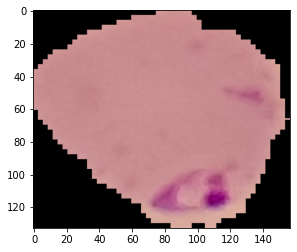

In [14]:
# viewing the actual image
plt.imshow(sample_image)

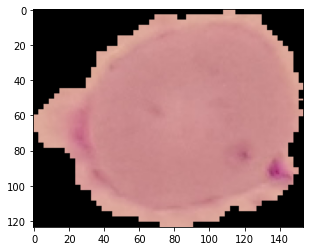

In [15]:
#viewing a random uninfected file image
sample_image = imread(train_path+'uninfected/'+os.listdir(train_path+'uninfected')[0])
plt.imshow(sample_image)

In [16]:
#checking the number of images in train data set
print('Number of train infected images > ', len(os.listdir(train_path+'parasitized')))
print('Number of train uninfected images > ', len(os.listdir(train_path+'uninfected')))

Number of train infected images >  12480
Number of train uninfected images >  12480


In [17]:
#checking the number of images in train data set
print('Number of test infected images > ', len(os.listdir(test_path+'parasitized')))
print('Number of test uninfected images > ', len(os.listdir(test_path+'uninfected')))


Number of test infected images >  1300
Number of test uninfected images >  1300


In [22]:
#checking on the image shapes
width = []
height = []
for image_file in os.listdir(train_path+'parasitized'):
    if image_file.endswith('.png'):
        image = imread(train_path+'parasitized/'+image_file)
        image_width,image_height,color_channel_count = image.shape
        width.append(image_width)
        height.append(image_height)
image_dimensions = pd.DataFrame({'width':width,'height':height}, columns=['width','height'])
image_dimensions.head()

,width,height
0,133,157
1,130,109
2,121,136
3,127,136
4,178,145


In [23]:
# from above we learn that our images have varying height and width dimensions
# our DL model will only accept a standard shape
# we shall have to resize our image
# in this case we shall resize our image to the mean image dimensions(130,130,3)
image_dimensions.describe()

,width,height
count,12479.000000,12479.000000
mean,134.360205,133.664476
std,21.891205,21.137344
min,40.000000,46.000000
25%,121.000000,121.000000
50%,133.000000,133.000000
75%,145.000000,145.000000
max,382.000000,394.000000


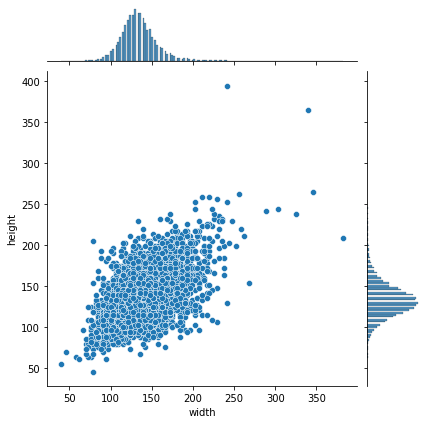

In [25]:
#this plot shows how the image width and height vary
sns.jointplot(x='width',y='height',data=image_dimensions)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
# This performs data augumentation of our image
# when called,it randomly generates a new image based on the below parameters
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [28]:
#getting batches from our directory
# We have to organize the directories with overal image folder and a subfolder for each image class
image_gen.flow_from_directory(train_path)


Found 24958 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.
